In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:

file_path = "/content/TASK-ML-INTERN.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


(None,
            hsi_id         0         1         2         3         4         5  \
 0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
 1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
 2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
 3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
 4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   
 
           6         7         8  ...       439       440       441       442  \
 0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
 1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
 2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
 3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
 4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   
 
         44

In [ ]:
df.shape

(500, 450)

In [ ]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()

# Summary statistics of the spectral data (excluding hsi_id)
summary_stats = df.iloc[:, 1:].describe()

missing_values, summary_stats


(0,
                 0           1           2           3           4           5  \
 count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
 mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
 std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
 min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
 25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
 50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
 75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
 max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   
 
                 6           7           8           9  ...         439  \
 count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
 mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
 std      0.044528    0.043773 

In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
missing_values

0

In [ ]:
# Drop the non-numeric column
df_numeric = df.drop(columns=["hsi_id"])

# Compute IQR for each column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by keeping only values within the boundaries
df_cleaned = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

# Display the number of rows before and after outlier removal
df.shape[0], df_cleaned.shape[0]


(500, 388)

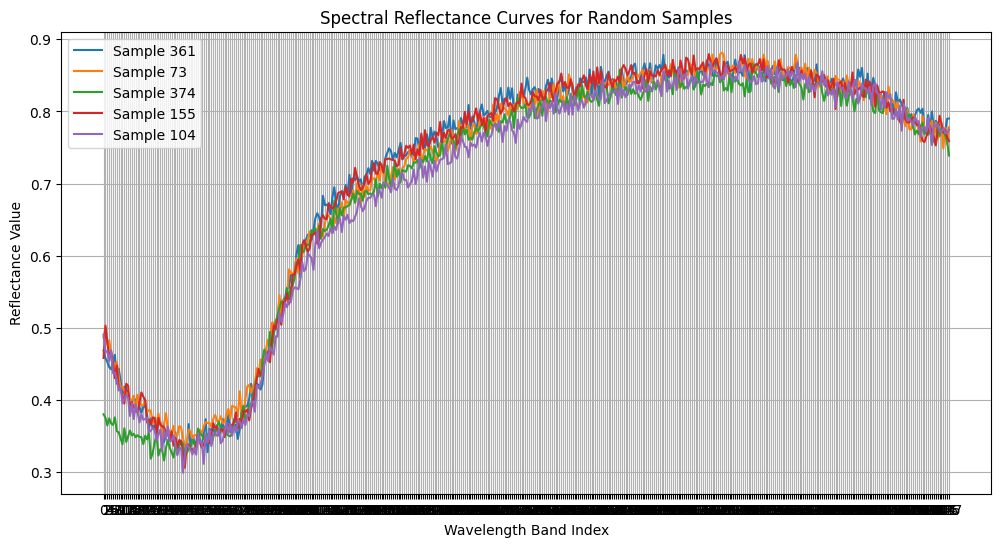

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select a few random samples for visualization
np.random.seed(42)
sample_indices = np.random.choice(df.index, 5, replace=False)
sample_data = df.iloc[sample_indices, 1:-1].T  # Transpose for wavelength-wise plotting

# Plot spectral reflectance curves
plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    plt.plot(sample_data.index, sample_data.iloc[:, i], label=f'Sample {idx}')

plt.xlabel('Wavelength Band Index')
plt.ylabel('Reflectance Value')
plt.title('Spectral Reflectance Curves for Random Samples')
plt.legend()
plt.grid()
plt.show()


#### The spectral reflectance curves show variations across different wavelength bands for selected corn samples. Next, I'll apply Principal Component Analysis (PCA) to reduce dimensionality and analyze variance.

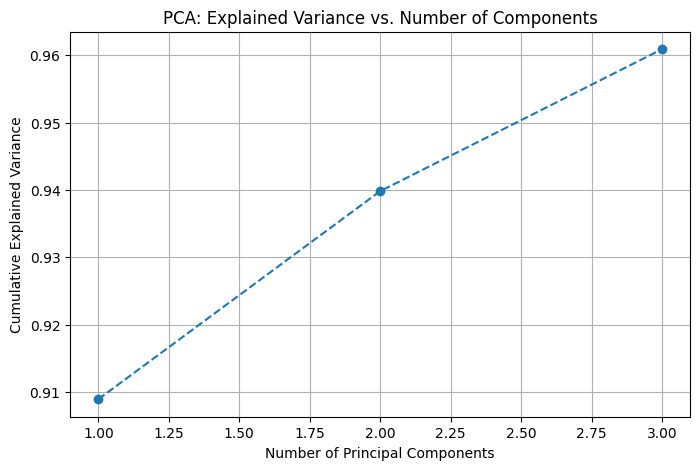

3

In [ ]:
from sklearn.decomposition import PCA

# Extract spectral data (excluding ID and target variable)
X = df.iloc[:, 1:-1]

# Apply PCA with enough components to explain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Number of components required to retain 95% variance
num_components = np.argmax(explained_variance >= 0.95) + 1
num_components


#### The plot shows that only 3 principal components are needed to retain 95% of the variance, significantly reducing dimensionality from 448 features.

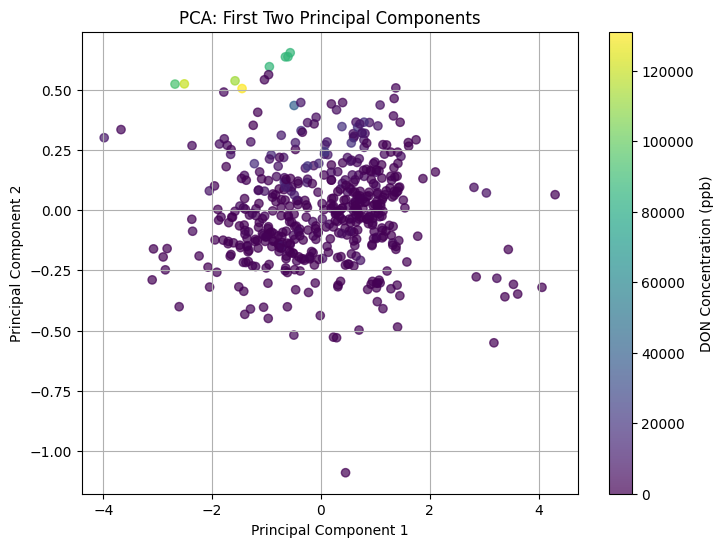

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["vomitoxin_ppb"], cmap="viridis", alpha=0.7)
plt.colorbar(label="DON Concentration (ppb)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.grid()
plt.show()


#### Observation - The PCA scatter plot shows that the first two components capture meaningful variance, with some clustering patterns related to DON concentration. Next, I'll apply t-SNE for a nonlinear visualization of the spectral data

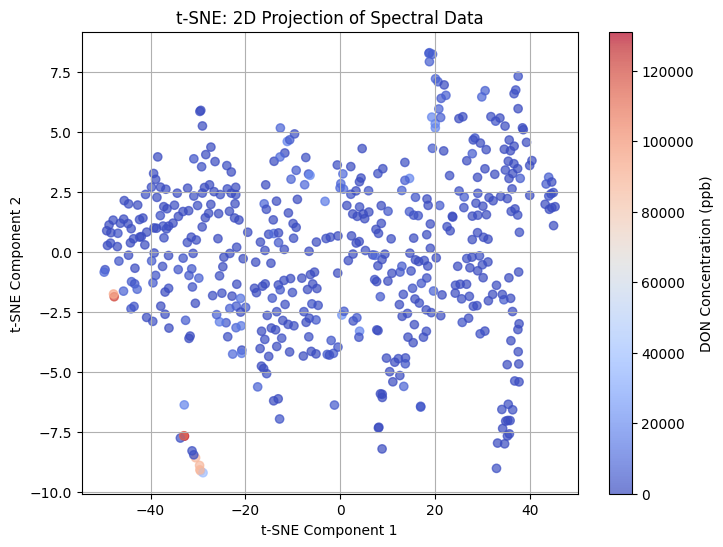

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["vomitoxin_ppb"], cmap="coolwarm", alpha=0.7)
plt.colorbar(label="DON Concentration (ppb)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE: 2D Projection of Spectral Data")
plt.grid()
plt.show()


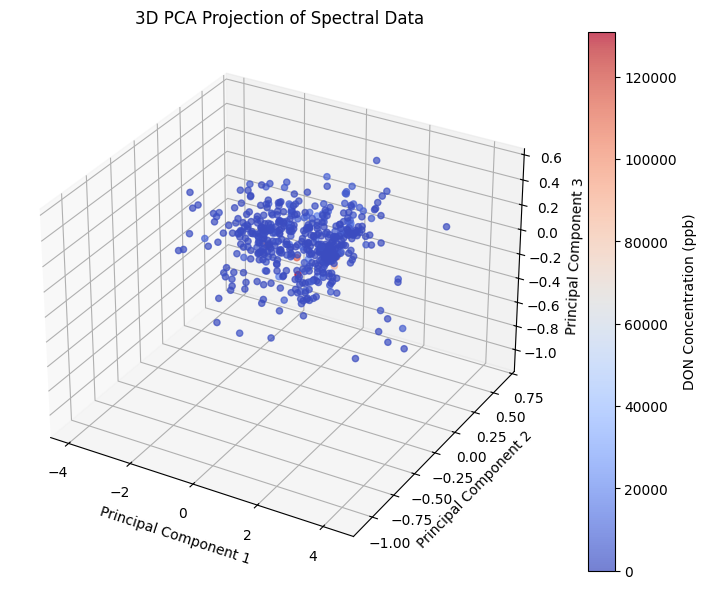

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                c=df["vomitoxin_ppb"], cmap="coolwarm", alpha=0.7)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection of Spectral Data")

plt.colorbar(sc, label="DON Concentration (ppb)")
plt.show()


Observations from the 3D PCA Projection:
Data is concentrated in a small region:

The majority of the data points are clustered within a narrow range of principal component values.
This suggests that most of the variance in the spectral data is explained by just a few principal components.
Few high-DON concentration outliers:

The red-colored points (high DON levels) are slightly separated from the dense blue cluster.
This indicates that extreme DON concentration samples might have unique spectral signatures.
Low variance along the third component:

The third principal component contributes much less variance compared to the first two.
This implies that a 2D PCA projection may be sufficient for most analysis.
No strong separation of classes:

Unlike well-separated clusters in some datasets, the spectral data does not have distinct groups.
This suggests that predicting DON concentration requires more complex relationships than simple PCA-based clustering.


In [ ]:
# Extract features (spectral data) and target variable (DON concentration)
X = df.drop(columns=["vomitoxin_ppb"])  # Features
y = df["vomitoxin_ppb"]  # Target variable

In [ ]:
print(X.dtypes)


hsi_id     object
0         float64
1         float64
2         float64
3         float64
           ...   
443       float64
444       float64
445       float64
446       float64
447       float64
Length: 449, dtype: object


In [ ]:
# Drop the non-numeric column
df_numeric = df.drop(columns=["hsi_id"])

# Separate features (X) and target (y)
X = df_numeric.drop(columns=["vomitoxin_ppb"]).values  # Features
y = df_numeric["vomitoxin_ppb"].values  # Target

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reshape for LSTM: (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # 3D for LSTM


In [ ]:
#Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

In [ ]:
# Check new shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 448, 1), (100, 448, 1), (400,), (100,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),  # First LSTM layer
    Dropout(0.2),
    LSTM(25),  # Second LSTM layer
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - loss: 107675336.0000 - mae: 2788.8000 - val_loss: 298746624.0000 - val_mae: 4393.0112
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - loss: 318117568.0000 - mae: 4338.8340 - val_loss: 298742400.0000 - val_mae: 4392.6963
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 332ms/step - loss: 217438608.0000 - mae: 3450.3953 - val_loss: 298738592.0000 - val_mae: 4392.4082
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - loss: 222791088.0000 - mae: 3781.4741 - val_loss: 298734432.0000 - val_mae: 4392.0957
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - loss: 217460672.0000 - mae: 3603.4094 - val_loss: 298730464.0000 - val_mae: 4391.7944
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - loss: 205200432.0000 - mae: 3485.1702 - val_loss: 298726752.0000 - val_mae: 4391.5186
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - loss: 191438416.0000 - mae: 3691.4250 - val_loss: 298723008.0000 - val_mae: 4391.2324
Epoch 8/1

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 224487664.0000 - mae: 3528.7773
Test MAE: 4392.33
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step


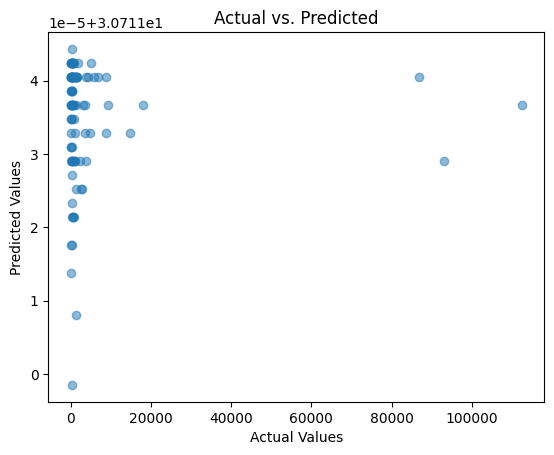

In [ ]:
# Evaluate on test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

# Predictions
y_pred = model.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


In [ ]:
print(mae)

4392.3310546875


In [ ]:
print(loss)

298737568.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get model predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
Mean Absolute Error (MAE): 4392.330717124939
Root Mean Squared Error (RMSE): 17284.026428134264
R² Score: -0.06870190211935179


In [ ]:
loss = model.history.history["loss"]

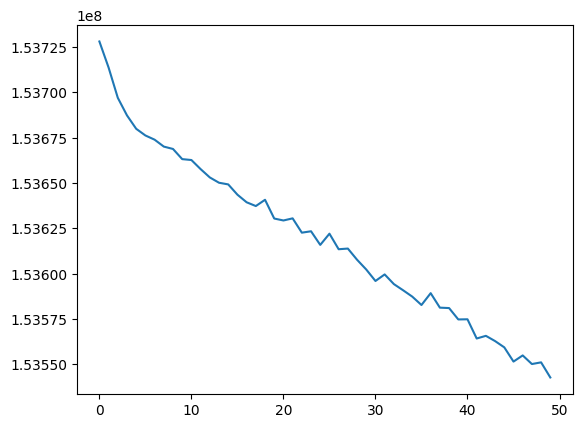

In [ ]:
plt.plot(range(len(loss)),loss)